# Part 1: Dealing with raw data

In [ ]:
install.packages("car")
install.packages("leaps")
install.packages("faraway")
install.packages("glmnet")

In [4]:
install.packages("glmnet")

also installing the dependencies 'codetools', 'iterators', 'foreach'



package 'codetools' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Mark Wei\AppData\Local\Temp\Rtmp23Zw9d\downloaded_packages


In [1]:
library(car)
library(leaps)
library(faraway)
library(glmnet)

Loading required package: carData
Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 

Attaching package: 'faraway'

The following objects are masked from 'package:car':

    logit, vif

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18



In [2]:
setwd("C:/Users/Mark Wei/Desktop/628/Project 2")

Read in the raw data and do data cleaning (detect points which bodyfat does not have a linear relationship of 1 / density), then get rid of the variable: "density":

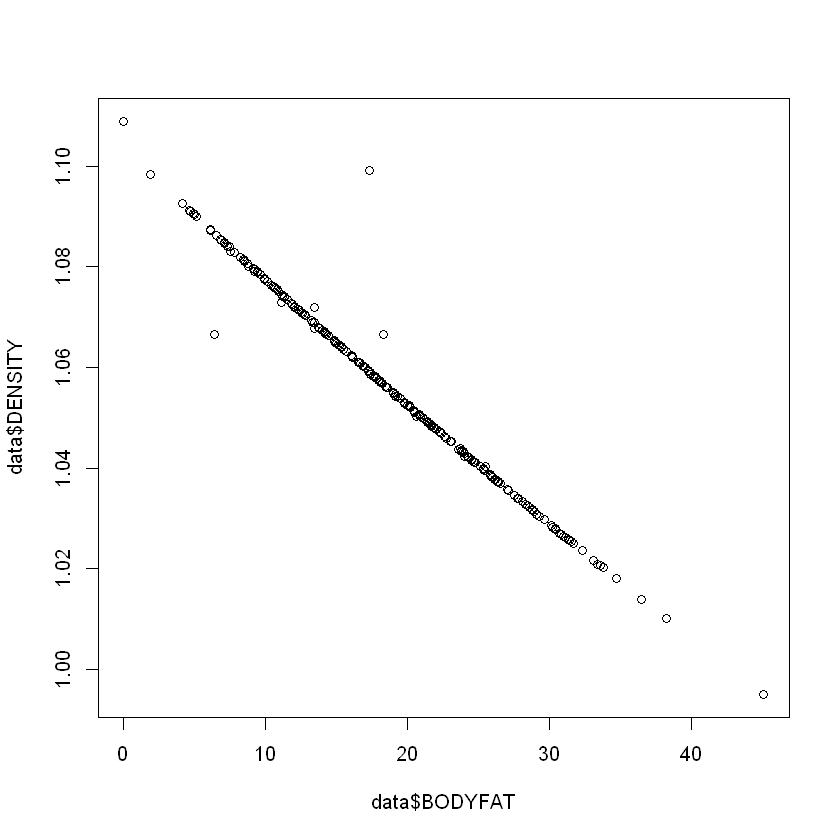

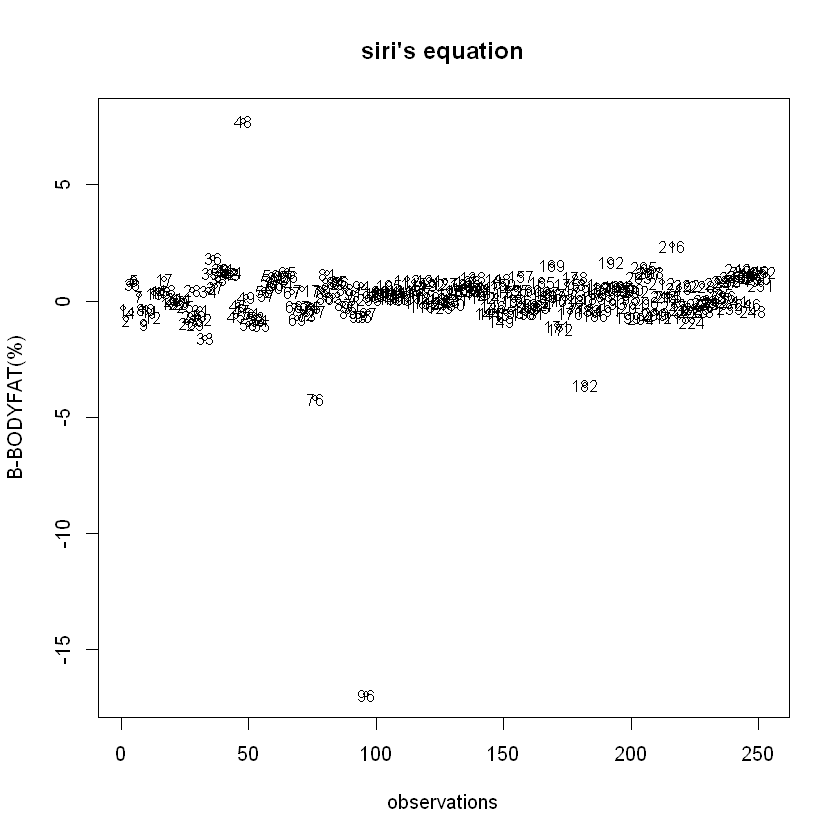

In [11]:
data = read.csv("BodyFat.csv", row.names = 1)
# data cleaning 
# detect points which bodyfat does not have a linear relationship of 1 / density
plot(data$BODYFAT,data$DENSITY)
B = 495*(1/data$DENSITY)-450
plot(B-data$BODYFAT,xlab = 'observations', ylab = 'B-BODYFAT(%)', main = "siri's equation",type="p",cex=0.7)
text(1:length(data[,1]), B-data$BODYFAT, 1:length(data[,1]),cex=0.8)
data_new = data[, -2]

Check the cook's distance one by one:

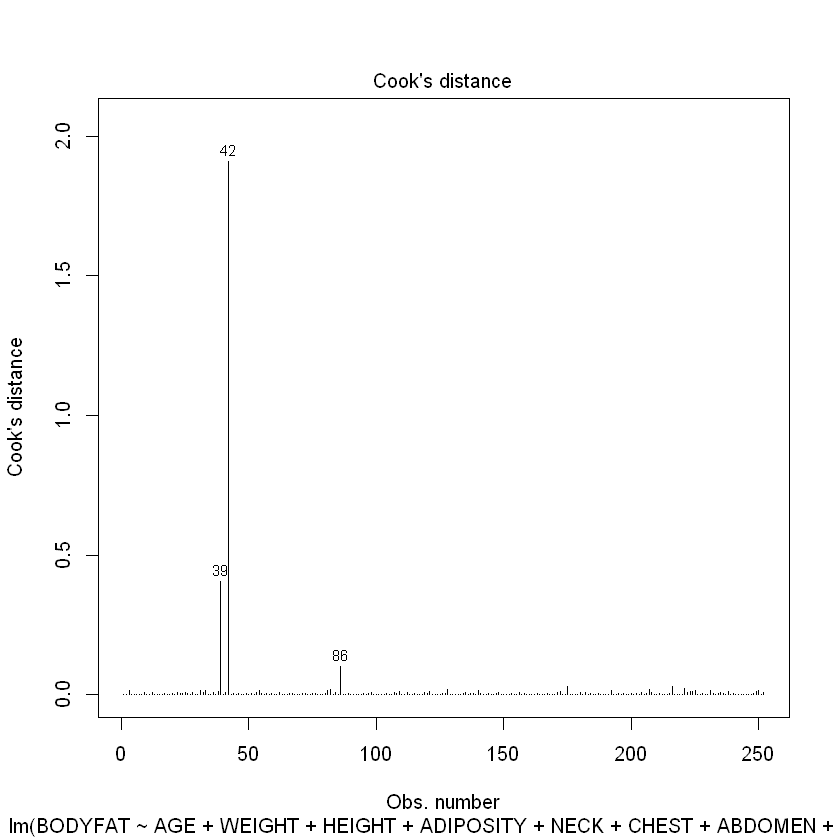

In [12]:
model1<- lm(BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST,
            data = data)
plot(model1, which = 4)

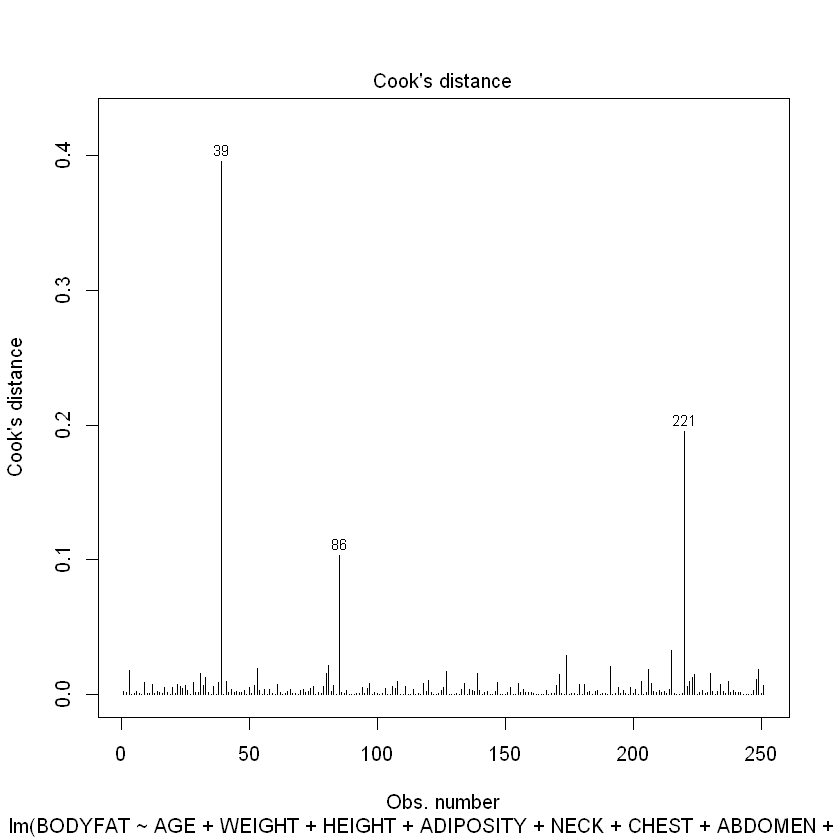

In [13]:
model2<- lm(BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST,
            data = data[-42,])
plot(model2, which = 4)

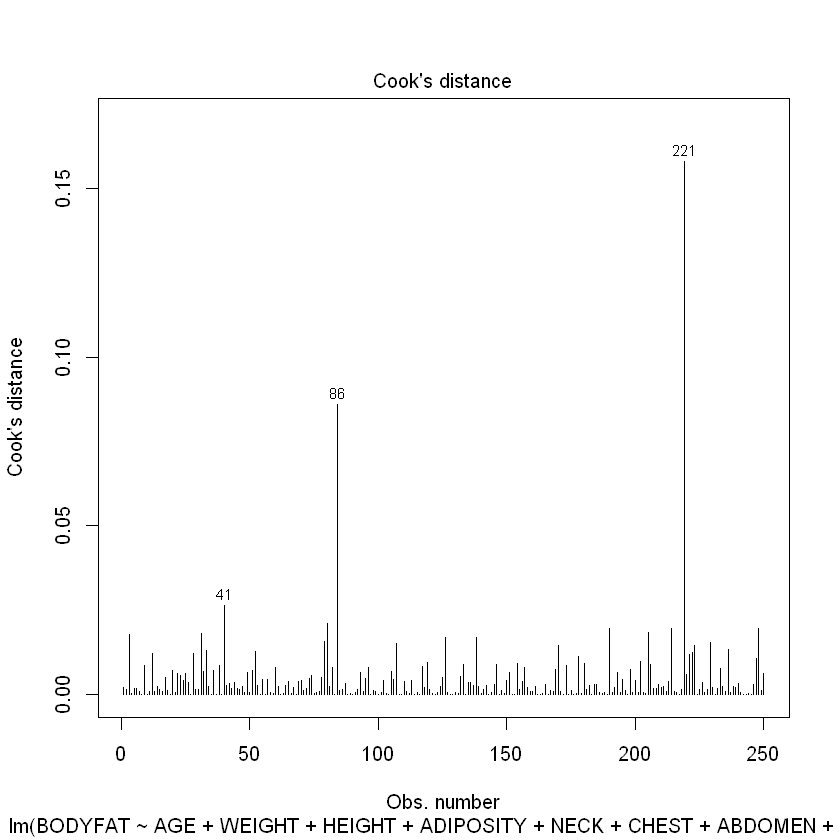

In [14]:
model3<- lm(BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST,
            data = data[-c(39,42),])
plot(model3, which = 4)

Then delete possible outliers. No.39 has too large weight; No.42 is way too short; 
No.8,No.76,No.96 does not match the relationship between bodyfat and density;
No.182 has bodyfat 0, it is a mistake.
We remove them and scale the data.

In [16]:
data[c(39, 42, 48, 96, 76, 182),]
data_clean = data_new[c(-39, -42, -48, -96, -76, -182), ]
data_clean<-data.frame(scale(data_clean))
write.csv(data_clean,"bodyfat_clean.csv",row.names = F)

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
42,31.7,1.0250,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
48,6.4,1.0665,39,148.50,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9
96,17.3,1.0991,53,224.50,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4
76,18.3,1.0666,61,148.25,67.50,22.9,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27.0,18.3
182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


We check new data's Cook's distance again and find nothing weird. The possible outlier No.227 might be caused by randomness. Also the outlierTest gives same conclusion.

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
227,-0.5341887,0.801263,-0.3326625,-0.7894715,0.0663065,-0.3391391,0.1149318,-0.1330352,-0.4113888,-0.5625032,-0.02107772,-0.3013611,0.3912692,0.3050366,0.6421832


No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
     rstudent unadjusted p-value Bonferroni p
224 -2.592132           0.010149           NA

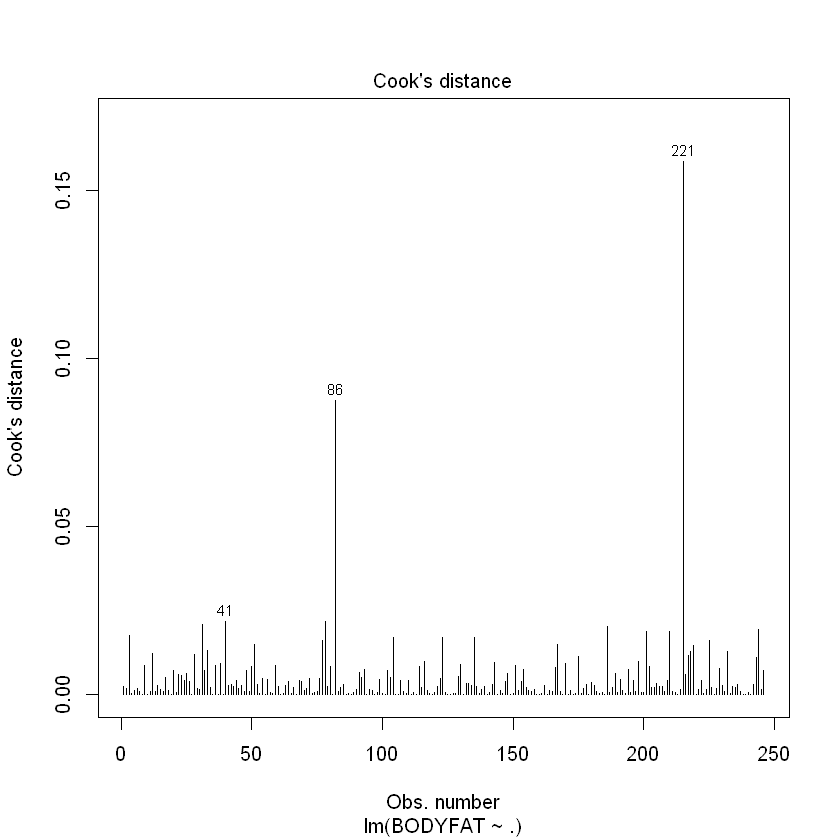

In [20]:
model = lm(BODYFAT ~ ., data = data_clean)
plot(model, which = 4)
data_clean[221,]

# outlier test
outlierTest(model)

# Part 2: Model selection